<a id="EDA-work"></a>
### EDA Notebook

This notebook is working through 

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [21]:
tv = pd.read_csv('/Users/hannah.toohey/Desktop/GA COURSE MATERIALS/FINAL PROJECT/TV_RESULTS_2017.csv')

In [22]:
tv.head()

,MARKET,LENGTH,AIR_TYPE,STATION_CODE,AFFILIATE,DATE_AIRED,TIME_AIRED,PROGRAM,ACCESS_CODE,CALL_DATE,...,EFF_DATE3,EFF_DATE4,T65_ED1,T65_ED2,EINQ_BD_SA,EINQ_SALE,EINQ_PD_BD,EINQ_PD_SL,AGE_THRESHOLD_CRPER,EINQ
0,Addressable,60.0,Addressable,AFCV,CAB,NaN,NaN,NaN,N656,2016-12-29-00-00-00,...,0,0,0,0,0,0,0,0,0.0,0
1,Addressable,60.0,Addressable,AFCV,CAB,NaN,NaN,NaN,N656,2017-01-13-00-00-00,...,0,0,0,0,0,0,0,0,0.0,0
2,Baltimore,60.0,Spot,EBAL,METV,2017-02-28-00-00-00,11:41A,NaN,WMN6,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,Addressable,60.0,Addressable,AFCV,CAB,NaN,NaN,NaN,N656,2017-01-22-00-00-00,...,0,0,0,0,0,0,0,0,0.0,0
4,Addressable,60.0,Addressable,AFCV,CAB,NaN,NaN,NaN,N656,2017-02-09-00-00-00,...,0,0,0,0,0,0,0,0,0.0,0


In [23]:
tv.columns

Index(['MARKET', 'LENGTH', 'AIR_TYPE', 'STATION_CODE', 'AFFILIATE',
       'DATE_AIRED', 'TIME_AIRED', 'PROGRAM', 'ACCESS_CODE', 'CALL_DATE',
       'CALL_TIME', 'FULL_DATE', 'SPOTS_RAN1', 'CG_SPEND', 'TOT_CALL', 'CPC',
       'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER', 'AGE_THRESHOLD',
       'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR', 'TOT_P_SALE', 'CPPS',
       '$_SPENT', '6411LEADS', '6511LEADS', '6669LEAD', '70LEAD', 'TOT_TRAN',
       'EFF_DATE1', 'EFF_DATE2', 'EFF_DATE3', 'EFF_DATE4', 'T65_ED1',
       'T65_ED2', 'EINQ_BD_SA', 'EINQ_SALE', 'EINQ_PD_BD', 'EINQ_PD_SL',
       'AGE_THRESHOLD_CRPER', 'EINQ'],
      dtype='object')

Dropping columns that are not helpful or are redundant (eg CG_SPEND and $_SPENT)

In [24]:
tv.drop(['$_SPENT','EFF_DATE1','EFF_DATE2','EFF_DATE3','EFF_DATE4','T65_ED1','T65_ED2','EINQ_BD_SA','EINQ_SALE','EINQ_PD_BD','EINQ_PD_SL'], axis=1, inplace=True)

In [25]:
tv.shape

(469106, 34)

In [26]:
tv.dtypes

MARKET                  object
LENGTH                 float64
AIR_TYPE                object
STATION_CODE            object
AFFILIATE               object
DATE_AIRED              object
TIME_AIRED              object
PROGRAM                 object
ACCESS_CODE             object
CALL_DATE               object
CALL_TIME               object
FULL_DATE               object
SPOTS_RAN1               int64
CG_SPEND               float64
TOT_CALL                 int64
CPC                    float64
LEADS                    int64
AGNT_OFFLD               int64
CPL                    float64
MSLTCPER               float64
AGE_THRESHOLD            int64
THRESHOLD_PER          float64
TOT_SALES                int64
CPS                    float64
CR                     float64
TOT_P_SALE               int64
CPPS                   float64
6411LEADS                int64
6511LEADS                int64
6669LEAD                 int64
70LEAD                   int64
TOT_TRAN                 int64
AGE_THRE

In [27]:
tv.loc[:,'AIR_TYPE'].value_counts()

Cable              231474
Network             98627
Spot                47662
Other               46404
MISC                14460
Satellite            9267
Local Cable          8864
Syndication          8641
VOD                  1881
PIs                  1376
Unwired Network       426
Addressable            15
Regional Cable          9
Name: AIR_TYPE, dtype: int64

In [67]:
tv.loc[:,'AIR_TYPE'].isnull().sum()

0

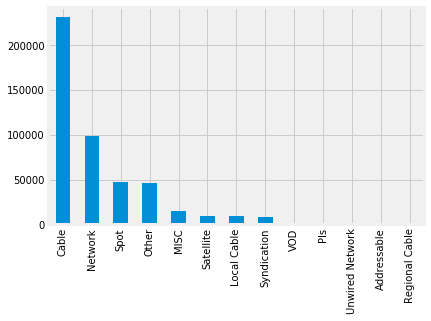

In [56]:
tv.loc[:,'AIR_TYPE'].value_counts().plot(kind='bar');

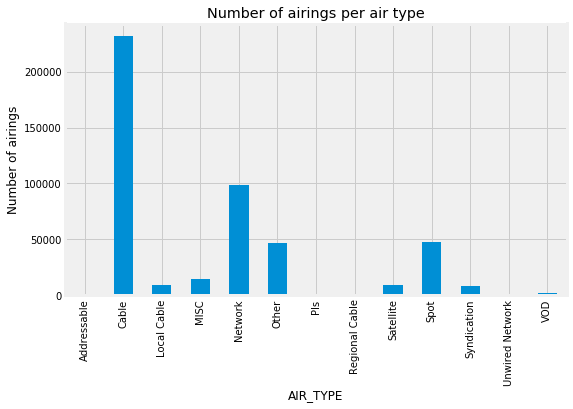

In [66]:
tv.loc[:, 'AIR_TYPE'].value_counts().sort_index().plot(kind='bar', figsize=(8,5));
plt.xlabel('AIR_TYPE');
plt.ylabel('Number of airings');
plt.title('Number of airings per air type');

In [28]:
tv.describe()

,LENGTH,SPOTS_RAN1,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,...,CR,TOT_P_SALE,CPPS,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ
count,454646.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,...,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000,469106.000000
mean,99.155871,0.114991,135.775807,1.010373,3.295186,0.562248,0.002006,1.876768,0.395512,0.125816,...,0.008926,0.021127,0.014703,0.187638,0.039407,0.107846,0.227424,0.117865,0.002519,0.109928
std,28.568721,0.319012,1270.131601,1.370966,242.638725,1.122175,0.053349,181.254572,0.556713,0.408684,...,0.092143,0.225951,5.165021,0.530133,0.207980,0.378021,0.605671,0.361796,0.049506,0.360536
min,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120.000000,1.000000,50960.981000,85.000000,50960.981000,45.000000,5.000000,50960.981000,2.000000,13.000000,...,3.000000,47.000000,2216.020000,18.000000,6.000000,11.000000,16.000000,11.000000,3.000000,9.000000


In [29]:
tv.loc[:,'CG_SPEND'].sum()

63693245.94500529

In [30]:
tv.loc[:,'CG_SPEND'].mean()

135.77580748275506

In [31]:
tv.loc[:,'CG_SPEND'].median()

0.0

In [32]:
tv.loc[:,'CG_SPEND'].mode()

0    0.0
dtype: float64

In [33]:
y = tv.loc[:,'CG_SPEND']
y

0          0.000
1          0.000
2         18.470
3          0.000
4          0.000
5          0.000
6          0.000
7          0.000
8          0.000
9          0.000
10         0.000
11         0.000
12         0.000
13         0.000
14         0.000
15         0.000
16         0.000
17         0.000
18         0.000
19        18.470
20        18.470
21        18.470
22        18.470
23         0.000
24         0.000
25         0.000
26        18.470
27        18.470
28        18.470
29        18.470
           ...  
469076    92.334
469077    92.334
469078    92.334
469079     0.000
469080    92.334
469081     0.000
469082     0.000
469083     0.000
469084     0.000
469085    92.334
469086    92.334
469087    92.334
469088    92.334
469089     0.000
469090     0.000
469091     0.000
469092     0.000
469093    92.334
469094    92.334
469095     0.000
469096     0.000
469097    92.334
469098    92.334
469099     0.000
469100    92.334
469101     0.000
469102    92.334
469103    92.3

In [34]:
y_pred = y.mean()
y_pred

135.77580748275506

In [35]:
mse = ((y - y_pred)**2).mean()
mse

1613230.8457162085

In [36]:
tv.corr()

,LENGTH,SPOTS_RAN1,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,...,CR,TOT_P_SALE,CPPS,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ
LENGTH,1.000000,-0.042685,0.007788,0.085825,0.000181,0.072412,-0.015779,0.000074,0.036029,0.036747,...,0.005455,0.009278,-0.002500,0.044986,0.025298,0.038562,0.061880,0.041049,0.004813,0.034785
SPOTS_RAN1,-0.042685,1.000000,0.296562,-0.263712,0.037676,-0.179115,-0.013303,0.028725,-0.253384,-0.110006,...,-0.034847,-0.033557,0.007897,-0.126537,-0.067752,-0.101934,-0.134258,-0.116322,-0.018339,-0.109127
CG_SPEND,0.007788,0.296562,1.000000,-0.076411,0.197035,-0.051549,-0.003966,0.156769,-0.072515,-0.031826,...,-0.010319,-0.009944,0.003762,-0.036535,-0.019685,-0.029090,-0.038626,-0.033315,-0.005439,-0.031458
TOT_CALL,0.085825,-0.263712,-0.076411,1.000000,0.000648,0.698541,0.044600,0.001048,0.210474,0.440464,...,0.031948,0.020281,-0.001486,0.540231,0.254252,0.400757,0.484147,0.383343,0.041600,0.373019
CPC,0.000181,0.037676,0.197035,0.000648,1.000000,0.002118,-0.000233,0.778121,0.006875,0.000781,...,-0.001122,-0.001191,0.006980,0.000627,0.000177,0.002923,0.001489,0.002716,-0.000691,0.000862
LEADS,0.072412,-0.179115,-0.051549,0.698541,0.002118,1.000000,0.067439,0.005580,0.639541,0.584105,...,0.074194,0.057805,-0.000679,0.701422,0.366164,0.585136,0.747902,0.441555,0.066608,0.562493
AGNT_OFFLD,-0.015779,-0.013303,-0.003966,0.044600,-0.000233,0.067439,1.000000,-0.000018,-0.013692,0.037604,...,0.000295,-0.001040,-0.000107,0.039604,0.029764,0.044556,0.052251,0.003213,-0.000299,0.003830
CPL,0.000074,0.028725,0.156769,0.001048,0.778121,0.005580,-0.000018,1.000000,0.012180,0.003507,...,-0.000744,-0.000862,0.009366,0.003680,0.001350,0.005850,0.003002,0.005166,-0.000527,0.003305
MSLTCPER,0.036029,-0.253384,-0.072515,0.210474,0.006875,0.639541,-0.013692,0.012180,1.000000,0.346358,...,0.111404,0.023200,-0.000516,0.391533,0.234181,0.378319,0.525531,0.272306,0.056833,0.379480
AGE_THRESHOLD,0.036747,-0.110006,-0.031826,0.440464,0.000781,0.584105,0.037604,0.003507,0.346358,1.000000,...,0.055730,0.040953,-0.000876,0.771580,0.330001,0.179486,0.181612,0.250908,0.126232,0.405711


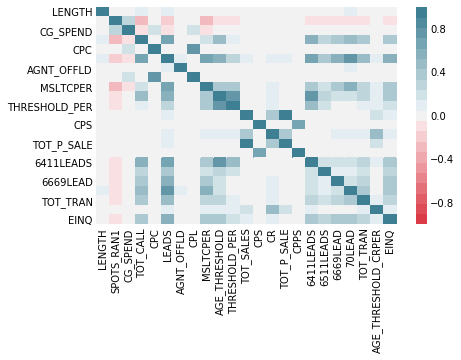

In [37]:
sns.heatmap(tv.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 220, n=21))

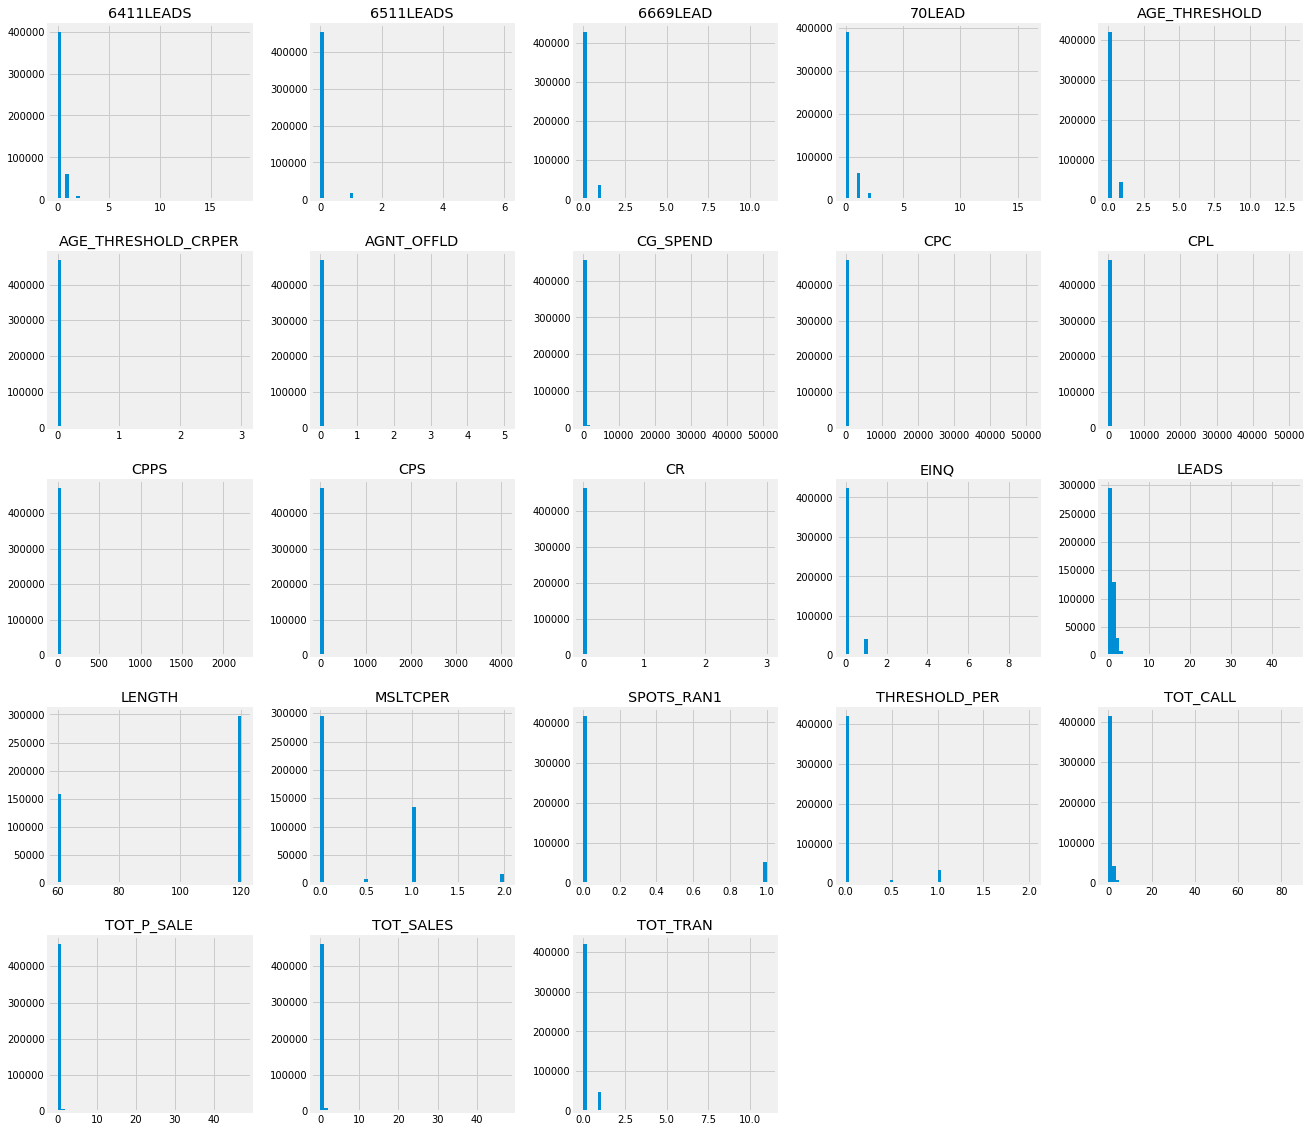

In [39]:
tv.hist(figsize=(20, 20), bins=50);

Need to convert the separate age band columns into one column that finds the age using idmax

In [43]:
ages = tv.loc[:,['6411LEADS','6511LEADS','6669LEAD','70LEAD']]
ages

,6411LEADS,6511LEADS,6669LEAD,70LEAD
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [48]:
agebands = ages.idxmax(axis=1)
agebands

0         6411LEADS
1         6411LEADS
2         6411LEADS
3         6411LEADS
4         6411LEADS
5         6411LEADS
6         6411LEADS
7         6411LEADS
8         6411LEADS
9         6411LEADS
10        6411LEADS
11        6411LEADS
12        6411LEADS
13        6411LEADS
14        6411LEADS
15        6411LEADS
16        6411LEADS
17        6411LEADS
18        6411LEADS
19        6411LEADS
20        6411LEADS
21        6411LEADS
22        6411LEADS
23        6411LEADS
24        6411LEADS
25        6411LEADS
26        6411LEADS
27        6411LEADS
28        6411LEADS
29        6411LEADS
            ...    
469076    6411LEADS
469077    6411LEADS
469078    6411LEADS
469079    6411LEADS
469080    6411LEADS
469081    6411LEADS
469082     6669LEAD
469083    6411LEADS
469084    6411LEADS
469085    6411LEADS
469086    6411LEADS
469087    6411LEADS
469088    6411LEADS
469089       70LEAD
469090    6411LEADS
469091    6411LEADS
469092    6411LEADS
469093    6411LEADS
469094    6411LEADS


In [49]:
tv['AGEBAND']=agebands

In [51]:
tv.loc[:, 'AGEBAND'] = tv.loc[:, 'AGEBAND'].map({'6411LEADS': 64, '6511LEADS': 65, '6669LEAD':66,'70LEAD':70})

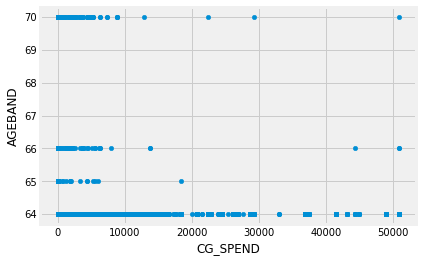

In [70]:
tv.plot(kind='scatter', x='CG_SPEND',y='AGEBAND')

We will need to create lots of dummy variables for this model to work!